In [3]:
import pymc3 as pm
import numpy as np
import pandas as pd
from theano import shared
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
#import iris dataset using pandas

path="C:/Users/Vaneeza Ahmad/Downloads/iris.csv"
iris_dataset=pd.read_csv(path)
#show if imported correctly
print(iris_dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [5]:
# Sepal Length and Petal Width
#calculating the pearson correlation coefficient using NumPy
sepal_length=iris_dataset['sepal_length'].values
petal_width=iris_dataset['petal_width'].values
pearson_coff1=np.corrcoef(sepal_length, petal_width)[0,1]
print(pearson_coff1)

0.8179411262715757


In [6]:
# Petal Length and Petal Width
#calculating the pearson correlation coefficient using NumPy
petal_length=iris_dataset['petal_length'].values
#(already done above) petal_width=iris_dataset['petal_width'].values
pearson_coff2=np.corrcoef(petal_length, petal_width)[0,1]
print(pearson_coff2)

0.9628654314027961


Text(0.5, 1.0, 'Scatter Plot (Correlation: 0.82)')

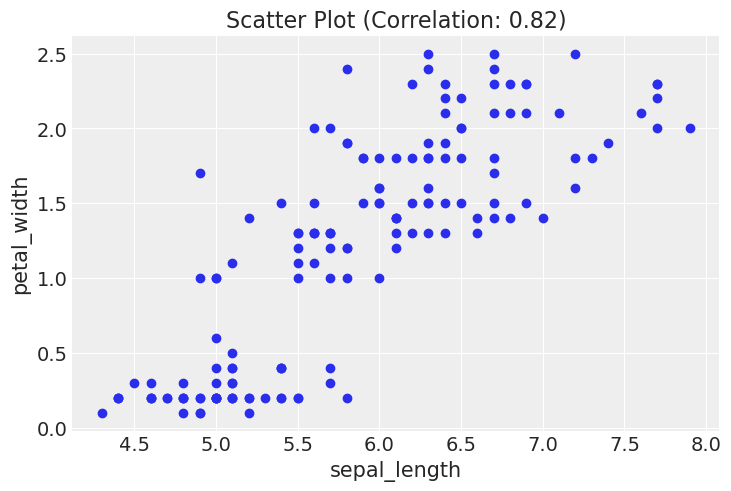

In [7]:
#plotting pearson correlation coefficient# 01
plt.scatter(sepal_length, petal_width)
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title(f'Scatter Plot (Correlation: {pearson_coff1:.2f})')

Text(0.5, 1.0, 'Scatter Plot (Correlation: 0.96)')

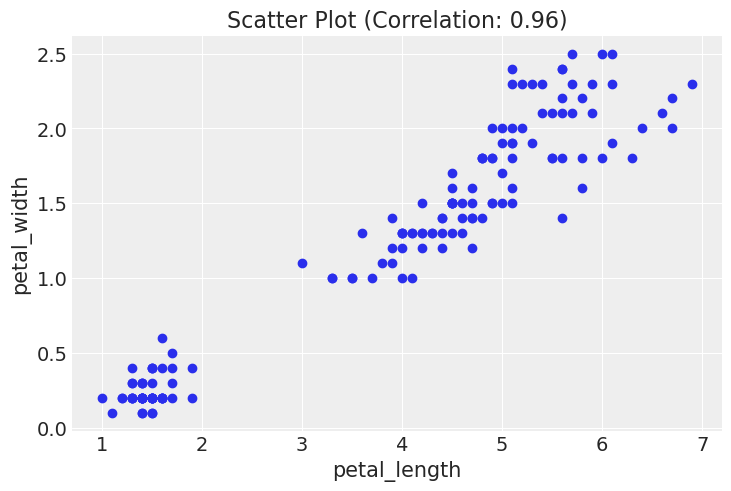

In [23]:
#plotting pearson correlation coefficient# 02
plt.scatter(petal_length, petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title(f'Scatter Plot (Correlation: {pearson_coff2:.2f})')

# Model 1
High Correlation Coefficient for petal_length and petal_width.
- Pearson Coefficient Value = 0.96 <br>
So, for model 1 using petal_length as x (independent variable)

In [27]:
# Model 1 for independant variable petal_length bcz of HIGH CORRELATION COEFFICIENT
x=petal_length
y=petal_width

#centralizing both x and y values
x = petal_length - petal_length.mean()
y = petal_width - petal_width.mean()

with pm.Model() as model_one:
    α = pm.Normal('α', mu=y.mean(), sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfNormal('ϵ', 10)
    y_pred1 = pm.Normal('y_pred1', mu=α + β * x,sd=ϵ, observed=y)
    data1 = pm.sample(2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


In [29]:
#posterior predictive checks for model1
ppc1 = pm.sample_posterior_predictive(data1, model=model_one)
# R Squared value for model 1
az.r2_score(y, ppc1['y_pred1'])

r2        0.923958
r2_std    0.001188
dtype: float64

# Model 2
Low Correlation Coefficient for sepal_length and petal_width
- Pearson Coefficient Value = 0.82 <br>
So, for model 2 using sepal_length as x (independent variable)

In [32]:
# Model 2 for independent variable sepal length bcz of LOW CORRELATION COEFFECIENT
x=sepal_length
y=petal_width

#centralizing both x and y values
x = sepal_length - sepal_length.mean()
y = petal_width - petal_width.mean()

with pm.Model() as model_two:
    α = pm.Normal('α', mu=y.mean(), sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfNormal('ϵ', 10)
    y_pred2 = pm.Normal('y_pred2', mu=α + β * x,sd=ϵ, observed=y)
    data2 = pm.sample(2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


In [33]:
#posterior predictive checks for model2
ppc2 = pm.sample_posterior_predictive(data2, model=model_two)
# R squared value for model 2
az.r2_score(y, ppc2['y_pred2'])

r2        0.658928
r2_std    0.003909
dtype: float64

## R square Values:
- Model 1 R-square value = 0.92
- Model 2 R-square value = 0.65

## Conclusions about R-squared Value:

Model 1 is better than Model 2 because:
- The R-square value closer to 1 indicates that the model explains all the variability in the dependent variable.
- The R-square value closer to 0 indicates that the model does not explain any of the variability in the dependent variable.

Hence in the current scenario <br>
"Model 1 is better than Model 2" because model one's value is closer to 1.